In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from collections import defaultdict

In [2]:


# import dataset
data = pd.read_csv("data/up-selling/bb/bb_user_ratings.csv")
try:
    data.drop(["Unnamed: 0"],axis=1,inplace=True)
except:
    pass
data_pca = data[["ACCOUNT_NUM.hash","package","pca_ratings"]].rename(columns={"pca_ratings":"ratings"})
data_pca.dropna(subset=["ratings"],inplace=True)
data = data[["ACCOUNT_NUM.hash","package","ratings"]]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67030 entries, 0 to 67029
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  67030 non-null  object 
 1   package           67030 non-null  object 
 2   ratings           67030 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.5+ MB


In [4]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25724 entries, 0 to 25723
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCOUNT_NUM.hash  25724 non-null  object 
 1   package           25724 non-null  object 
 2   ratings           25724 non-null  float64
dtypes: float64(1), object(2)
memory usage: 803.9+ KB


## Interaction Matrix

In [5]:
# create a histogram of all the interactions by all the users present in the dataset
def create_interaction_matrix(data):
    interactions = data.groupby('ACCOUNT_NUM.hash').count()['package']
    plt.hist(interactions,bins=20)
    plt.show()

    # create the user item matrix using the ratings dataset - Hint: try using pivot function 
    interactions_metrix = data.pivot_table(index="ACCOUNT_NUM.hash", columns="package", values="ratings",aggfunc=np.sum)
    # replace all the missing values with zero
    return interactions_metrix.fillna(0)

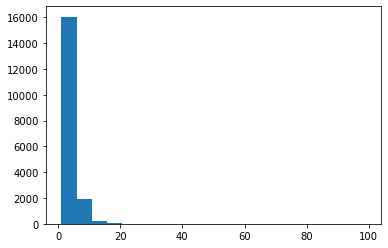

package,ANY BEAT,ANY BLAZE,ANY FLIX,ANY JOY,ANY SPIKE,ANY STORM,ANY TIDE,BROADBAND EXPERIENCE,FTTH_ANY BLAZE,FTTH_ANY DELIGHT,...,WEB CHAMP,WEB FAMILY ACTIVE,WEB FAMILY PLUS,WEB FAMILY XTRA,WEB LITE,WEB MASTER,WEB PAL,WEB PRO,WEB STARTER,XCITE
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
000eee57a6c7a02c8aca8b410ea2e287,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6875,0.0
000f325a72b9d24742237070939b57d1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9375,0.0
00103d1ae201c2ddb33b965f44f280b1,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
0011c1b02e2403c74c75ae8b5582e018,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,0.0
0012377a9a647a0119ba84158127ae8f,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe2bae6a0c7c4b20dec84f505cec1b3,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
ffec2210afd448ef3cf76f20d6dc1814,0.0,0.0,0.0,1.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
ffee4f0542d8f581b56b6b3dc7e2c178,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


In [7]:
create_interaction_matrix(data)

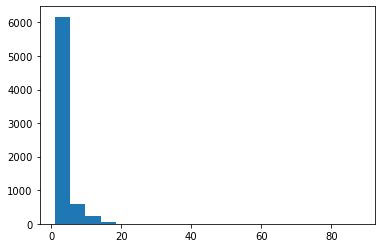

package,ANY BEAT,ANY BLAZE,ANY FLIX,ANY JOY,ANY SPIKE,ANY STORM,ANY TIDE,BROADBAND EXPERIENCE,FTTH_ANY BLAZE,FTTH_ANY DELIGHT,...,VDSL_WEB FAMILY PLUS,WEB BOOSTER,WEB FAMILY ACTIVE,WEB FAMILY PLUS,WEB FAMILY XTRA,WEB LITE,WEB PAL,WEB PRO,WEB STARTER,XCITE
ACCOUNT_NUM.hash,,,,,,,,,,,,,,,,,,,,,
000f325a72b9d24742237070939b57d1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.832006,0.0
0013519e648e9718c56e1e6ccfb3b17d,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.574361,0.0,0.000000,0.0
001461eda095f55eb35ea34116af1598,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0017b4bec0c82391b1f8692cc2ed9777,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
0024a31050a006edc3f0466dc5396f16,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe2bae6a0c7c4b20dec84f505cec1b3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
ffec2210afd448ef3cf76f20d6dc1814,0.0,0.0,0.0,2.192533,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
ffee4f0542d8f581b56b6b3dc7e2c178,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [8]:
create_interaction_matrix(data_pca)

## Function Definition

In [9]:
def train_test_splitter(data):
    reader = Reader(rating_scale=(0, 1))
    data_model = Dataset.load_from_df(data, reader)
    return data_model,train_test_split(data_model, test_size=.20)

In [10]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [11]:
def get_top_n(predictions, n=10):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:5]
        

    return top_n

In [17]:
# calculate NDCG
def ndcg(y_true, y_pred, k=None, powered=False):
    def dcg(scores, k=None, powered=False):
        if k is None:
            k = scores.shape[0]
        if not powered:
            ret = scores[0]
            for i in range(1, k):
                ret += scores[i] / np.log2(i + 1)
            return ret
        else:
            ret = 0
            for i in range(k):
                ret += (2 ** scores[i] - 1) / np.log2(i + 2)
            return ret
    
    ideal_sorted_scores = np.sort(y_true)[::-1]
    ideal_dcg_score = dcg(ideal_sorted_scores, k=k, powered=powered)
    
    pred_sorted_ind = np.argsort(y_pred)[::-1]
    pred_sorted_scores = y_true[pred_sorted_ind]
    dcg_score = dcg(pred_sorted_scores, k=k, powered=powered)
    
    return dcg_score / ideal_dcg_score

def ndcg1(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=False)

def ndcg2(y_true, y_pred, k=None):
    return ndcg(y_true, y_pred, k=k, powered=True)

In [18]:
def top_n_pred(predictions):
    top_n = get_top_n(predictions, n=3)
    #print(top_n)
    users_est = defaultdict(list)
    users_true=defaultdict(list)
    rec_for_user=defaultdict(list)
    for uid, user_ratings in top_n.items():
        users_est[uid].append([est for (_, est,_) in user_ratings])
        users_true[uid].append([true_r for (_,_,true_r) in user_ratings])
        rec_for_user[uid].append([iid for (iid,_,_) in user_ratings])
    return top_n, users_est, users_true, rec_for_user

In [19]:
def calc_ndcg(users_true,users_est):
    ndcg_list=[]
    for uid in top_n:
        
        for i in users_true[uid]:
            y_true=np.asarray(i)#.reshape(-1,1)
        for i in users_est[uid]:
            y_pred=np.asarray(i)#.reshape(-1,1)
        
            ndcg_list.append(ndcg1(y_true, y_pred, k=None))

    ndcg_list = [i for i in ndcg_list if str(i) != 'nan']
    ndgc_rate = np.mean(ndcg_list)
    return ndcg_list, ndgc_rate

## Colbarative Recommenders with Suprise

In [20]:
data_model, (trainset, testset) = train_test_splitter(data)
data_model_pca, (trainset_pca, testset_pca) = train_test_splitter(data_pca)

### SVD recommender

In [21]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
svd_validate = cross_validate(algo, data_model_pca, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2924  0.2912  0.2904  0.2952  0.2896  0.2917  0.0020  
MAE (testset)     0.2519  0.2496  0.2497  0.2525  0.2471  0.2502  0.0019  
Fit time          1.10    1.10    1.10    1.12    1.17    1.12    0.03    
Test time         0.04    0.03    0.03    0.04    0.03    0.03    0.00    


In [22]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset_pca)
predictions = algo.test(testset_pca)

In [23]:
top_n, users_est, users_true, rec_for_user = top_n_pred(predictions)

In [24]:
ndcg_list, ndgc_rate = calc_ndcg(users_true,users_est)
print("NDCG", ndgc_rate)

NDCG 0.9915754977245176


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [25]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [26]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
954,83f5be6f5e4955a03cb7ab366ff23f81,WEB PAL,0.456698,0.456646,{'was_impossible': False},3,4886,0.000052
4956,adda7501be086dce60d0bf7754254313,WEB FAMILY PLUS,0.402109,0.401980,{'was_impossible': False},5,6203,0.000129
4342,74027f231f7c3d7828a37170edcbdec8,FTTH_WEB FAMILY PLUS,0.513658,0.513420,{'was_impossible': False},2,5430,0.000238
154,fc974ad199c0830ca1dcd0e76d7c89de,FTTH_WEB FAMILY XTRA,0.447633,0.447318,{'was_impossible': False},3,1494,0.000315
5031,9e89caf3fe84621fd782150324876389,WEB STARTER,0.378825,0.379274,{'was_impossible': False},6,5492,0.000448
4853,c672fdff483d0a76daaa22201fafde84,WEB LITE,0.425046,0.424564,{'was_impossible': False},2,9543,0.000483
5050,e47e58571b633b09a0b815340794b035,LTE_WEB FAMILY PLUS,0.335911,0.335364,{'was_impossible': False},2,2091,0.000547
2678,fb527a53d63a2a0235abc6fdc2ceb02a,WEB LITE,0.335666,0.336537,{'was_impossible': False},8,9543,0.000871
3529,a0aaf77047878ef7fc9134278c9afef0,LTE_WEB PAL,0.370064,0.370947,{'was_impossible': False},13,2080,0.000883
1413,7a857dfe2193d2fabd3f852c431faeaa,WEB STARTER,0.404636,0.405538,{'was_impossible': False},1,5492,0.000902


In [27]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2897
RMSE --> 0.28970600016066317
Accuracy --> 0.7102939998393368


### SlopeOne recommender

In [185]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
so_validate =cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2956  0.2626  0.2782  0.2876  0.2759  0.2800  0.0112  
MAE (testset)     0.2446  0.2240  0.2315  0.2402  0.2311  0.2343  0.0073  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


In [186]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

<ipython-input-186-c41232ee9814>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  algo.fit(trainset)


In [187]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [188]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
51,f82988e91a4bf7836b6ae8dd3cc299a8,Web LITE,0.272569,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.000296
180,b01535596dd60b9098c08b185309f52c,Web LITE,0.270833,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.001441
103,3824b3901488c8309867305ac0bca1ed,Web Family Plus,0.276042,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,173,0.003768
74,0e33abf80db5a53508635d5c87a66f6a,Web LITE,0.267361,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.004913
219,b32630170cef8463c8f6f7f5525a2d80,z Sales End_SLT Staff Home,0.267361,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,1,0.004913
257,4777d3f7a35ff5bf2fe138dbf0c81304,Web LITE,0.262153,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.010121
99,f9d3e41bc42777e69dc59dd8737f4131,Web Starter,0.260417,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,131,0.011857
224,06b0e86e8d218a11ddf948ae6201f260,Web LITE,0.258681,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.013593
127,b3ab395c931bf11d95da0cf46c9f628a,Web Starter,0.258681,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,131,0.013593
60,2a3defd31d0d00ec39286695766c38ed,Web LITE,0.289931,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.017657


In [189]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2786
RMSE --> 0.2786172681092916
Accuracy --> 0.7213827318907085


### KNN with Means recommender

In [190]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
knn_validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2938  0.2644  0.2879  0.2728  0.2805  0.2799  0.0105  
MAE (testset)     0.2479  0.2201  0.2402  0.2247  0.2385  0.2343  0.0103  
Fit time          0.14    0.13    0.11    0.12    0.11    0.12    0.01    
Test time         0.01    0.00    0.01    0.00    0.00    0.00    0.00    


In [191]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [192]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [193]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
51,f82988e91a4bf7836b6ae8dd3cc299a8,Web LITE,0.272569,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.000296
180,b01535596dd60b9098c08b185309f52c,Web LITE,0.270833,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.001441
103,3824b3901488c8309867305ac0bca1ed,Web Family Plus,0.276042,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,173,0.003768
74,0e33abf80db5a53508635d5c87a66f6a,Web LITE,0.267361,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.004913
219,b32630170cef8463c8f6f7f5525a2d80,z Sales End_SLT Staff Home,0.267361,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,1,0.004913
257,4777d3f7a35ff5bf2fe138dbf0c81304,Web LITE,0.262153,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.010121
99,f9d3e41bc42777e69dc59dd8737f4131,Web Starter,0.260417,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,131,0.011857
224,06b0e86e8d218a11ddf948ae6201f260,Web LITE,0.258681,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.013593
127,b3ab395c931bf11d95da0cf46c9f628a,Web Starter,0.258681,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,131,0.013593
60,2a3defd31d0d00ec39286695766c38ed,Web LITE,0.289931,0.272274,"{'was_impossible': True, 'reason': 'User and/o...",0,347,0.017657


In [194]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2786
RMSE --> 0.2786172681092916
Accuracy --> 0.7213827318907085


### Benchmark algorithms

In [195]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
val_df = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
val_df

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usin

,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.256823,0.096396,0.003199
SVD,0.257684,0.130200,0.002798
BaselineOnly,0.258294,0.004199,0.002601
KNNWithMeans,0.279977,0.101198,0.004201
SlopeOne,0.280097,0.029798,0.005800
CoClustering,0.280159,0.220489,0.002199


## CF Recommenders Accuracy Plots

In [196]:
svd_validate["test_rmse"]

array([0.24864276, 0.25131093, 0.26022467, 0.2625523 , 0.26218684])

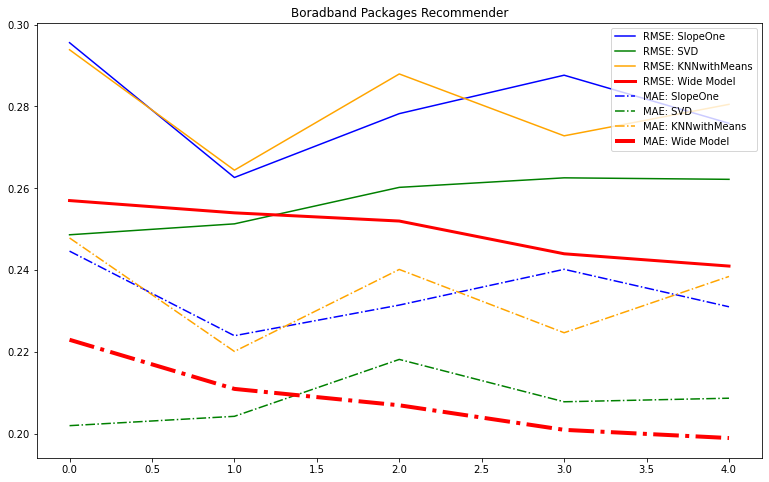

In [209]:
fig,ax = plt.subplots(figsize=(13,8))
ax.plot(so_validate["test_rmse"], color='blue')
ax.plot(svd_validate["test_rmse"], color='green')
ax.plot(knn_validate["test_rmse"], color='orange')
ax.plot([0.257,0.254,0.252,0.244,0.241],linewidth=3, color='red')
ax.plot(so_validate["test_mae"], linestyle='dashdot', color='blue')
ax.plot(svd_validate["test_mae"], linestyle='dashdot', color='green')
ax.plot(knn_validate["test_mae"], linestyle='dashdot', color='orange')
ax.plot([0.223,0.211,0.207,0.201,0.199],linewidth=4, linestyle='dashdot', color='red')
# plt.xticks(np.arange(0, 30, 0.5))
plt.title("Boradband Packages Recommender", loc="center")
plt.legend(["RMSE: SlopeOne","RMSE: SVD","RMSE: KNNwithMeans","RMSE: Wide Model",
           "MAE: SlopeOne","MAE: SVD","MAE: KNNwithMeans","MAE: Wide Model"])

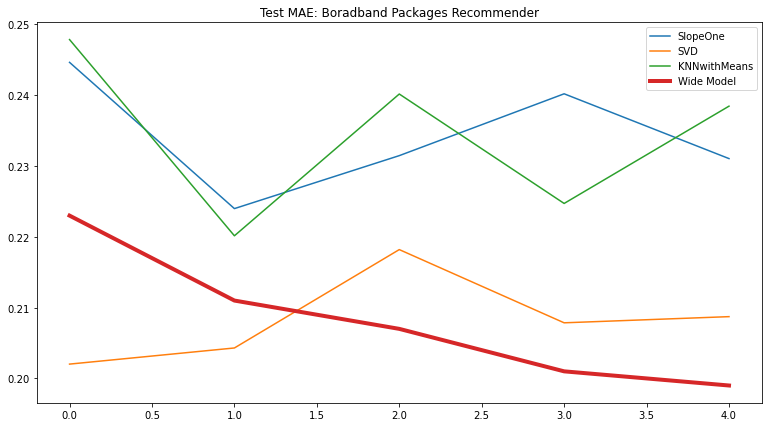

In [202]:
fig,ax = plt.subplots(figsize=(13,7))
ax.plot(so_validate["test_mae"])
ax.plot(svd_validate["test_mae"])
ax.plot(knn_validate["test_mae"])
ax.plot([0.223,0.211,0.207,0.201,0.199],linewidth=4)
# plt.xticks(np.arange(0, 4, 0.2))
plt.title("Test MAE: Boradband Packages Recommender", loc="center")
plt.legend(["SlopeOne","SVD","KNNwithMeans","Wide Model"])